<a href="https://colab.research.google.com/github/etalab-ia/ami-ia/blob/master/notebooks/ami_ia_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook NLP

Introduction au NLP avec l'examples de la consultation 

In [12]:
# adresse sur data gouv : https://www.data.gouv.fr/fr/datasets/consultation-citoyenne-en-ligne-sur-les-retraites-1/

# import libraries
import re
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [13]:
# importer un fichier depuis votre ordinateur local 

#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

In [14]:
# lire le jeu de données en un objet "pandas dataframe"
path = '/Users/kimmontalibet/Desktop/datagouv/'
df = pd.read_csv(path + "cada-2020-05-12.csv", sep = ",", header = 0)
#df = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/93aed7ce-db2f-4982-8127-340562061e4b", sep = ",", header = 0)

In [15]:
df.shape

(38287, 11)

In [16]:
df.columns

Index(['Numéro de dossier', 'Administration', 'Type', 'Année', 'Séance',
       'Objet', 'Thème et sous thème', 'Mots clés', 'Sens et motivation',
       'Partie', 'Avis'],
      dtype='object')

In [17]:
df.head()

,Numéro de dossier,Administration,Type,Année,Séance,Objet,Thème et sous thème,Mots clés,Sens et motivation,Partie,Avis
0,19840002,ministre de la défense,Avis,1984,03/03/1984,[Voir avis],"Justice, Ordre Public Et Sécurité/Défense Et D...",Armée,Défavorable/Défense,III,La commission d'accès aux documents administra...
1,19840003,ministre de la défense,Avis,1984,13/12/1984,[Voir avis],"Economie, Industrie, Agriculture/Secteurs Écon...",Armée,"Irrecevable/Imprécise, Défavorable/Défense, In...",III,La commission d'accès aux documents administra...
2,19850001,"ministre de l'économie, des finances et du budget",Avis,1985,05/12/1985,[Voir avis],"Justice, Ordre Public Et Sécurité/Association,...",NaN,Défavorable,III,La commission d'accès aux documents administra...
3,19860001,directeur départemental du travail et de l'emp...,Conseil,1986,30/01/1986,(voir avis),Travail Et Emploi/Droit Du Travail,"Licenciement, Conditions de travail","Défavorable/Procédure, Sans objet",III,La commission d'accès aux documents administra...
4,19870061,gouverneur de la Banque de France,Avis,1987,02/04/1987,[Voir avis],"Economie, Industrie, Agriculture/Secteurs Écon...",Banques et assurances,"Défavorable/Sécurité publique, Favorable/Sauf ...",III,La commission d'accès aux documents administra...


In [20]:
## On regarde le nombre de modalités pour les variables catégorielles
df.describe(include = np.object)

,Administration,Type,Séance,Objet,Thème et sous thème,Mots clés,Sens et motivation,Partie,Avis
count,38286,38287,38287,38270,38206,33125,38271,36059,38286
unique,12850,3,569,35334,828,3615,3094,4,37519
top,Direction générale des finances publiques (DGFIP),Avis,31/12/2017,"Communication, par envoi postal ou par courrie...",Travail Et Emploi / Emploi Public,Marché public,Favorable,III,"Monsieur X, pour l’association Regards citoyen..."
freq,1255,35562,1450,556,3025,1838,11407,31429,132


In [10]:
len(set(df["Numéro de dossier"]))

38287

In [11]:
df["Type"].value_counts()

Avis        35562
Conseil      2722
Sanction        3
Name: Type, dtype: int64

### Visualisation du nombre d'avis par année

In [17]:
# on crée une dataframe avec une ligne par année, la colonne count donne le nombre d'avis par année 
df["count"] = 1
dfg = df.groupby("Année").agg("sum").reset_index()

Text(0.5, 1.0, "Nombre d'avis CADA par année")

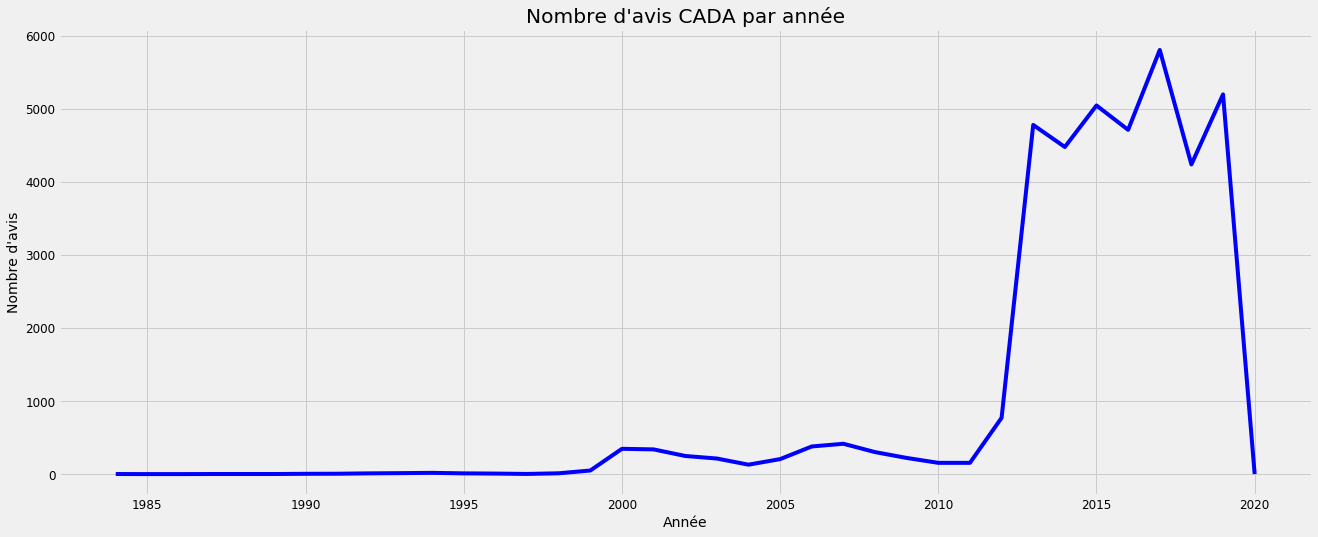

In [33]:
plt.figure(figsize=(20, 8))
plt.plot(dfg['Année'], dfg['count'], 'b-')
plt.xlabel('Année'); plt.ylabel("Nombre d'avis"); plt.title("Nombre d'avis CADA par année")

In [41]:
print(len(df[df["Année"].isin(range(2008, 2020))]))

35857


Text(0.5, 1.0, "Nombre d'avis CADA par année")

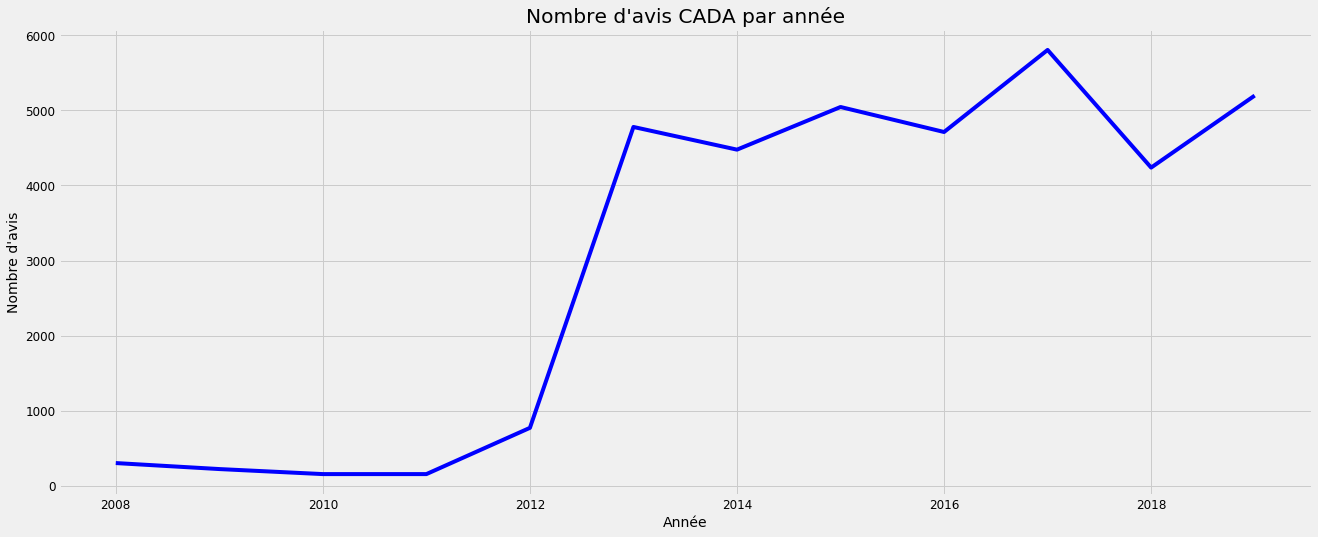

In [42]:
plt.figure(figsize=(20, 8))
plt.plot(dfg[dfg["Année"].isin(range(2008, 2020))]['Année'], dfg[dfg["Année"].isin(range(2008, 2020))]['count'], 'b-')

plt.xlabel('Année'); plt.ylabel("Nombre d'avis"); plt.title("Nombre d'avis CADA par année - Période 2008-2020")

# Partie 1 : manipulation de données textuelles basiques


In [ ]:
# article : créer TF et TF IDF from scratch : https://towardsdatascience.com/text-summarization-using-tf-idf-e64a0644ace3 

In [23]:
# importation des librairies NLP 
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kimmontalibet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# on étudie ici les textes des avis 
# on supprime les lignes pour lesquelles l'avis n'est pas renseigné
df = df.dropna(subset = ["Avis"]) 
print(df.shape)

In [ ]:
df["avis_sent_token"] = df["Avis"].map(sent_tokenize)
df["avis_word_token"] = df["Avis"].map(word_tokenize)

In [ ]:
df["nb_char"] = df["Avis"].map(len)
df["nb_sent_token"] = df["avis_sent_token"].map(len)
df["nb_word_token"] = df["avis_word_token"].map(len)

In [ ]:
df[["nb_char", "nb_word_token", "nb_sent_token" ]].describe()

In [ ]:
# une fois qu'on a divisé notre texte en une liste de mots, on peut faire plusieurs opérations de netoyage 
# - retirer la ponctuation 
# - mettre tous les caractères en minuscules (peut aussi être fait avant la tokenization)
# - enlever les stopwords (mots sans apport pour comprendre le sens de la phrase)
# - lemmatiser ou stemmer afin de regrouper deux termes proches en un terme unique : 
    # personnes -> personne
    # conduisent, conduis, etc.. -> conduire

In [ ]:
# on peut ensuite "vectoriser ces listes de mots afin de les rendre intelligible par une machine
# il existe plusieurs méthode de vectoriser 
    # la matrice de term frequency 
    # la matrice tf-idf
    # les word embeddings 

In [138]:
# exemple de word embeddings of word2vec
sentences = df["avis_word_token"].tolist()
from gensim.models import Word2Vec
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

In [139]:
model.most_similar("médecin")

[('généraliste', 0.655626118183136),
 ('agréé', 0.6517902612686157),
 ('prescripteur', 0.6218041181564331),
 ('intermédiaire', 0.6169997453689575),
 ('désigne', 0.6065273284912109),
 ('spécialistes', 0.5890629887580872),
 ('régulateur', 0.5599677562713623),
 ('docteur', 0.5592317581176758),
 ('traitant', 0.5321307182312012),
 ('spécialiste', 0.48233020305633545)]

In [140]:
model.most_similar("maire")

[('préfète', 0.7589961290359497),
 ('préfet', 0.7407832145690918),
 ('sceaux', 0.5662443041801453),
 ('académie', 0.5592095255851746),
 ('ministre', 0.5444050431251526),
 ('président', 0.5424714684486389),
 ('présidente', 0.5273807048797607),
 ('recteur', 0.5181554555892944),
 ('directeur', 0.48822686076164246),
 ('garde', 0.4639958143234253)]

In [145]:
model.most_similar("demande")

[('demandée', 0.38057392835617065),
 ('obtenir', 0.3669607639312744),
 ('sollicitée', 0.3607199490070343),
 ('intéressée', 0.35437801480293274),
 ('demandé', 0.33897343277931213),
 ('demander', 0.332382470369339),
 ('reposent', 0.3322491943836212),
 ('documents', 0.3318790793418884),
 ('sollicités', 0.3279246687889099),
 ('invoquant', 0.32424890995025635)]

# Partie 2 : topic extraction (non supervisé)


## Un algorithme d'extraction de topiques: LDA (Latent Dirichlet Allocation) 

### ressource : article très pédagogique (en anglais) dont on s'inspire ici https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc 

### A quoi sert cet algorithme? 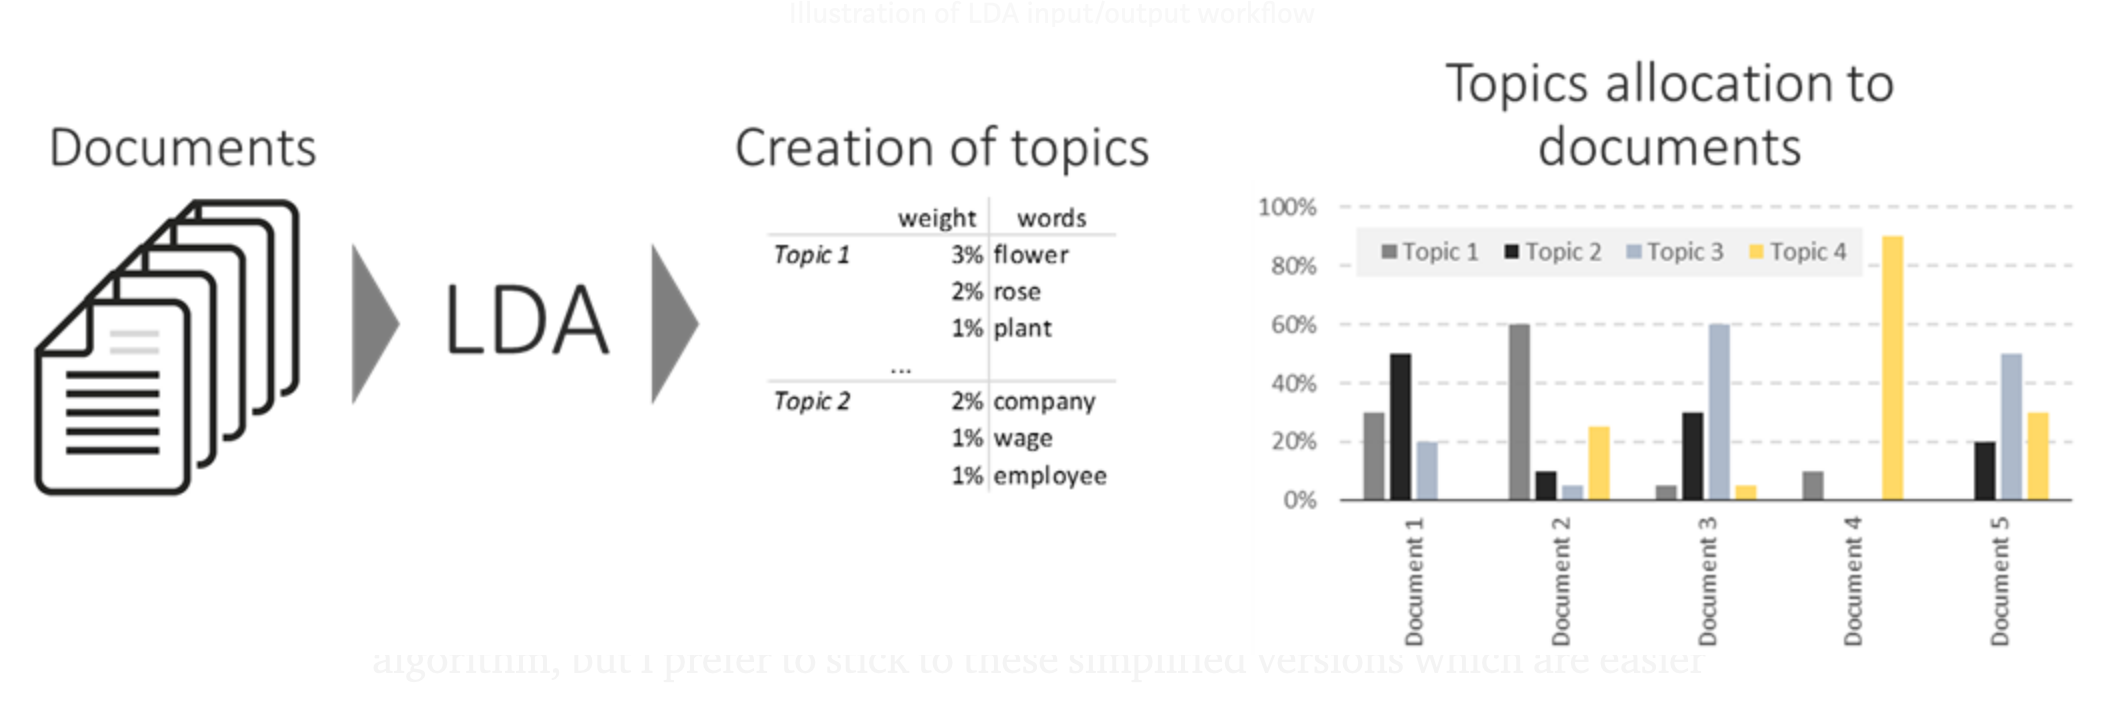


In [88]:
# Etape 0 : importation de la librairie avec l'algorithme 
#!pip install gensim si ce n'est pas déjà fait 
import nltk
nltk.download('stopwords')
from gensim import models
from gensim.models import Phrases
from gensim import corpora
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimmontalibet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
# Etape 1 :préparation et nettoyage des données textuelles 

# supression de la ponctuation (pour certains cas d'usage, il est cependant utile de garder la ponctuation)
# tokenization 

df["avis_word_token"] = df["Avis"].map(lambda x : word_tokenize(x.replace("'", " ")))


In [90]:
# on regarde ce que ce ca donne

numero_doc = 0

print("Document initial")
print(df.loc[numero_doc, "Avis"])
print("\n")
print("Document tokénisé")
print(df.loc[numero_doc, "avis_word_token"])
print("\n")
print("Nombre de token dans le doc :{}".format(len(df.loc[numero_doc, "avis_word_token"])))


Document initial
La commission d'accès aux documents administratifs a examiné dans sa séance du 3 mars 1984 la demande dont vous l'avez saisie par lettre du 21 décembre 1983.

La commission a émis un avis défavorable à la communication du dossier d'enquête relatif au refus de votre admission en qualité d'élève-officier de réserve interprète et du chiffre de la Marine, au motif qu'elle porterait atteinte au secret de la défense nationale, exception prévue par l'article 6 de la loi du 17 juillet 1978.


Document tokénisé
['La', 'commission', 'd', 'accès', 'aux', 'documents', 'administratifs', 'a', 'examiné', 'dans', 'sa', 'séance', 'du', '3', 'mars', '1984', 'la', 'demande', 'dont', 'vous', 'l', 'avez', 'saisie', 'par', 'lettre', 'du', '21', 'décembre', '1983', '.', 'La', 'commission', 'a', 'émis', 'un', 'avis', 'défavorable', 'à', 'la', 'communication', 'du', 'dossier', 'd', 'enquête', 'relatif', 'au', 'refus', 'de', 'votre', 'admission', 'en', 'qualité', 'd', 'élève-officier', 'de', 'r

In [91]:
# on supprime les tokens avec la ponctuation et on mets tous les mots en minuscule 
df["avis_word_token"] = df["avis_word_token"].map(lambda list_word: [word.lower()  for word in list_word if word.isalpha()])

In [92]:
numero_doc = 0

print("Document initial")
print(df.loc[numero_doc, "Avis"])
print("\n")
print("Document tokénisé")
print(df.loc[numero_doc, "avis_word_token"])
print("\n")
print("Nombre de token dans le doc :{}".format(len(df.loc[numero_doc, "avis_word_token"])))

Document initial
La commission d'accès aux documents administratifs a examiné dans sa séance du 3 mars 1984 la demande dont vous l'avez saisie par lettre du 21 décembre 1983.

La commission a émis un avis défavorable à la communication du dossier d'enquête relatif au refus de votre admission en qualité d'élève-officier de réserve interprète et du chiffre de la Marine, au motif qu'elle porterait atteinte au secret de la défense nationale, exception prévue par l'article 6 de la loi du 17 juillet 1978.


Document tokénisé
['la', 'commission', 'd', 'accès', 'aux', 'documents', 'administratifs', 'a', 'examiné', 'dans', 'sa', 'séance', 'du', 'mars', 'la', 'demande', 'dont', 'vous', 'l', 'avez', 'saisie', 'par', 'lettre', 'du', 'décembre', 'la', 'commission', 'a', 'émis', 'un', 'avis', 'défavorable', 'à', 'la', 'communication', 'du', 'dossier', 'd', 'enquête', 'relatif', 'au', 'refus', 'de', 'votre', 'admission', 'en', 'qualité', 'd', 'de', 'réserve', 'interprète', 'et', 'du', 'chiffre', 'de'

In [93]:
# création de la liste de stopwords
custom_stopwords = ["a", "dont", "madame", "monsieur", "peut", "dès", "lors", "être", "ce",
                    "ces", "cet", "cette", "comme", "ainsi", "si"]
stopwords_fr = stopwords.words('french') + custom_stopwords
print(len(stopwords_fr))
#print(stopwords_fr)

# on enlève les stopwords
df["avis_word_token"] = df["avis_word_token"].map(lambda list_word: [word for word in list_word if word not in stopwords_fr])


172


In [94]:
numero_doc = 0

print("Document initial")
print(df.loc[numero_doc, "Avis"])
print("\n")
print("Document tokénisé")
print(df.loc[numero_doc, "avis_word_token"])
print("\n")
print("Nombre de token dans le doc :{}".format(len(df.loc[numero_doc, "avis_word_token"])))

Document initial
La commission d'accès aux documents administratifs a examiné dans sa séance du 3 mars 1984 la demande dont vous l'avez saisie par lettre du 21 décembre 1983.

La commission a émis un avis défavorable à la communication du dossier d'enquête relatif au refus de votre admission en qualité d'élève-officier de réserve interprète et du chiffre de la Marine, au motif qu'elle porterait atteinte au secret de la défense nationale, exception prévue par l'article 6 de la loi du 17 juillet 1978.


Document tokénisé
['commission', 'accès', 'documents', 'administratifs', 'examiné', 'séance', 'mars', 'demande', 'saisie', 'lettre', 'décembre', 'commission', 'émis', 'avis', 'défavorable', 'communication', 'dossier', 'enquête', 'relatif', 'refus', 'admission', 'qualité', 'réserve', 'interprète', 'chiffre', 'marine', 'motif', 'porterait', 'atteinte', 'secret', 'défense', 'nationale', 'exception', 'prévue', 'article', 'loi', 'juillet']


Nombre de token dans le doc :37


In [144]:
# Etape 3: Entrainement de l'algorithme 


In [145]:
# création des tokens avec bigrammes et trigrammes 

tokens = df['avis_word_token'].tolist()
bigram_model = Phrases(tokens)
#trigram_model = Phrases(bigram_model[tokens], min_count=1)
#tokens = list(trigram_model[bigram_model[tokens]])
tokens = list(bigram_model[tokens])

In [146]:

dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]



# les inputs : le corpus de documents tokenizé et le dictionnaire 
# (liste des mots apparaissant dans le dictionnaire)

np.random.seed(123456)
num_topics = 13
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

CPU times: user 3min 4s, sys: 1.09 s, total: 3min 5s
Wall time: 1min 37s


In [105]:
# Etape 4 : Visualisation des topics 

In [147]:
# avec 15 topics 
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.054*"environnement" + 0.020*"articles" + 0.016*"informations_relatives" + 0.016*"éléments" + 0.016*"toute_personne" + 0.015*"état" + 0.014*"relations_entre" + 0.013*"dispositions" + 0.011*"ii" + 0.009*"suivants"

1: 0.032*"maire" + 0.030*"toute_personne" + 0.029*"relations_entre" + 0.026*"fait" + 0.023*"commune" + 0.021*"communicables" + 0.018*"émet_donc" + 0.017*"général_collectivités" + 0.014*"territoriales" + 0.014*"point"

2: 0.022*"électronique" + 0.019*"sous_forme" + 0.018*"communicables" + 0.017*"relations_entre" + 0.016*"sans" + 0.013*"demandeur" + 0.012*"document" + 0.010*"administratifs" + 0.010*"urbanisme" + 0.009*"courrier"

3: 0.013*"informations" + 0.013*"dispositions" + 0.008*"patrimoine" + 0.007*"relations_entre" + 0.007*"relève" + 0.007*"données" + 0.006*"i" + 0.006*"si" + 0.005*"secret" + 0.005*"articles"

4: 0.042*"avis" + 0.040*"réponse" + 0.040*"adressée" + 0.036*"informé" + 0.034*"relations_entre" + 0.028*"objet" + 0.028*"présent_avis" + 0.026*"courrier" + 0.

In [148]:
# Etape 5 : Attribution des topics aux documents 
# pour un document
print(lda_model[corpus[0]])

# pour tous les documents, on crée une colonne topic number 
df["topic_list"] = [lda_model[i] for i in corpus]
# la commande ci dessus nous permet, pour chaque document, d'obtenir une liste de topics avec les probabilités associées 
# que chaque document appartienne 
df["main_topic"] = df["topic_list"].map(lambda list_topic: list_topic[0][0])
df["main_topic_proba"] = df["topic_list"].map(lambda list_topic: list_topic[0][1])

[(3, 0.39996174), (8, 0.20867616), (9, 0.05495047), (12, 0.18364261), (13, 0.1484405)]


In [149]:
df.head()

,Numéro de dossier,Administration,Type,Année,Séance,Objet,Thème et sous thème,Mots clés,Sens et motivation,Partie,...,avis_sent_token,avis_word_token,nb_sent_token,nb_word_token,nb_char,topic_number,topic_list,main_topic,main_topic_proba,nombre_documents
0,19840002,ministre de la défense,Avis,1984,03/03/1984,[Voir avis],"Justice, Ordre Public Et Sécurité/Défense Et D...",Armée,Défavorable/Défense,III,...,[La commission d'accès aux documents administr...,"[commission, accès, documents, administratifs,...",2,85,487,"[(2, 0.2405408), (3, 0.21813786), (6, 0.267669...","[(3, 0.39998546), (8, 0.2086728), (9, 0.054950...",3,0.399985,1
1,19840003,ministre de la défense,Avis,1984,13/12/1984,[Voir avis],"Economie, Industrie, Agriculture/Secteurs Écon...",Armée,"Irrecevable/Imprécise, Défavorable/Défense, In...",III,...,[La commission d'accès aux documents administr...,"[commission, accès, documents, administratifs,...",5,166,958,"[(1, 0.37916613), (3, 0.514167), (9, 0.1048719...","[(0, 0.06563173), (1, 0.06717406), (3, 0.43948...",0,0.065632,1
2,19850001,"ministre de l'économie, des finances et du budget",Avis,1985,05/12/1985,[Voir avis],"Justice, Ordre Public Et Sécurité/Association,...",NaN,Défavorable,III,...,[La commission d'accès aux documents administr...,"[commission, accès, documents, administratifs,...",3,135,787,"[(0, 0.08384879), (1, 0.27281243), (3, 0.46044...","[(3, 0.2683253), (8, 0.2226971), (9, 0.1245112...",3,0.268325,1
3,19860001,directeur départemental du travail et de l'emp...,Conseil,1986,30/01/1986,(voir avis),Travail Et Emploi/Droit Du Travail,"Licenciement, Conditions de travail","Défavorable/Procédure, Sans objet",III,...,[La commission d'accès aux documents administr...,"[commission, accès, documents, administratifs,...",3,88,532,"[(1, 0.4382), (3, 0.5570809)]","[(8, 0.49311316), (10, 0.07508632), (14, 0.426...",8,0.493113,1
4,19870061,gouverneur de la Banque de France,Avis,1987,02/04/1987,[Voir avis],"Economie, Industrie, Agriculture/Secteurs Écon...",Banques et assurances,"Défavorable/Sécurité publique, Favorable/Sauf ...",III,...,[La commission d'accès aux documents administr...,"[commission, accès, documents, administratifs,...",6,332,1821,"[(1, 0.27457714), (3, 0.20922416), (7, 0.13349...","[(3, 0.48792934), (7, 0.019602876), (8, 0.3766...",3,0.487929,1


In [150]:
df["nombre_documents"] = 1
df_topic = df.groupby("main_topic").agg({"nombre_documents": sum}).reset_index()


In [153]:
df_topic.dtypes

main_topic          int64
nombre_documents    int64
dtype: object

In [156]:
df_topic.sort_values(by = "nombre_documents", ascending = "False", inplace = True)
df_topic

,main_topic,nombre_documents
13,13,5
11,11,32
10,10,60
9,9,83
12,12,143
7,7,161
8,8,567
5,5,572
6,6,934
2,2,1257


In [108]:
# Etape 6 : Eventuellement retour à l'étape 3 en testant différents paramètres 


In [159]:
# Etape 7: visualisation des topics

%matplotlib inline
# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim


/Users/kimmontalibet/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [160]:
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

# Partie 3 (pour aller plus loin) :  prédiction du sebs de la décision à partir du texte de l'avis 

In [46]:
# première étape: simplifier la colonne "sens et motivation" en un petit nombre de catégorie
df = df.dropna(subset = ["Sens et motivation"])
df["sens_token"] = df["Sens et motivation"].map(lambda x: word_tokenize(x.lower().replace("'", " ").replace("/", " ")))


In [47]:
df["nb_tokens_motivation"] = df["sens_token"].map(len)

In [48]:
df["nb_tokens_motivation"].describe()

count    38271.000000
mean         4.047373
std          3.886343
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         49.000000
Name: nb_tokens_motivation, dtype: float64

In [49]:
# on cherche les tokens les plus représentés: 
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
vect = CountVectorizer()
vect.fit(df["Sens et motivation"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [51]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))
dict_vocabulary = vect.vocabulary_

Vocabulary size: 101
Vocabulary content:
 {'défavorable': 31, 'défense': 32, 'irrecevable': 51, 'imprécise': 44, 'incompétence': 47, 'renseignement': 83, 'procédure': 73, 'sans': 86, 'objet': 65, 'sécurité': 92, 'publique': 81, 'favorable': 41, 'sauf': 87, 'préparatoire': 79, 'secret': 88, 'abusive': 1, 'vie': 97, 'privée': 72, 'commercial': 15, 'industriel': 48, 'judiciaire': 52, 'cnil': 14, 'loi': 57, 'spéciale': 91, 'mandat': 61, 'juridictionnel': 53, 'inexistant': 49, 'déliberation': 33, 'communiqué': 17, 'diplomatie': 25, 'privé': 71, 'refus': 82, 'non': 64, 'établi': 99, 'abonnement': 0, 'motivation': 63, 'inachevé': 45, 'appréciation': 3, 'comportement': 18, 'établissement': 100, 'de': 21, 'document': 27, 'si': 90, 'vous': 98, 'produisez': 74, 'un': 95, 'la': 55, 'personne': 69, 'concernée': 20, 'mal': 60, 'dirigée': 26, 'délibération': 34, 'hors': 43, 'champ': 13, 'détruit': 36, 'fiscal': 42, 'douanier': 30, 'avis': 10, 'ce': 12, 'archives': 4, 'préalable': 77, 'article': 5, 'a

In [83]:
def sens_categorie(x): 
    if "défavorable" in x: 
        return "defavorable"
    elif "favorable" in x: 
        return "favorable"
    elif "incompétence" in x: 
        return "incompetence"
    elif "irrecevable" in x: 
        return "incompetence"
    elif ("sans" in x) and ("objet" in x):
        return "sans_objet"
    else: 
        return "autre"
    
df["sens_categorie"] = df["sens_token"].map(sens_categorie)

In [137]:
df["sens_categorie"].value_counts()

favorable       22739
sans_objet       7128
defavorable      5055
incompetence     3349
Name: sens_categorie, dtype: int64

In [ ]:
# model prediction using 
# - term frequency matrix from text of avis
# - tf-idf from the text of avis

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [99]:
df["text"] = df["avis_word_token"].map(lambda x: " ".join(x))

In [100]:
# split train / test data 
text_train, text_test, y_train, y_test = train_test_split(df["text"], df["sens_categorie"], test_size = 0.2, random_state = 42)


In [ ]:
# First : tf matrix 

In [108]:
vect = CountVectorizer(min_df = 10).fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<30616x8972 sparse matrix of type '<class 'numpy.int64'>'
	with 3622222 stored elements in Compressed Sparse Row format>


In [110]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 8972
First 20 features:
['aa', 'aadecaa', 'ab', 'abandon', 'abandonné', 'abandonnée', 'abandonnés', 'abattage', 'abbaye', 'abbé', 'abf', 'abidjan', 'abonnement', 'abonnements', 'abonné', 'abonnés', 'abord', 'abords', 'abouti', 'aboutir']
Every 2000th feature:
['aa', 'conteste', 'images', 'pluvial', 'susmentionnés']


In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
scores = cross_val_score(MultinomialNB(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.77


In [115]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 12, 14, 16, 20, 30, 40]}
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)



Best cross-validation score: 0.80
Best parameters:  {'alpha': 20}


In [116]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.81


In [ ]:
# Second : tf-idfmatrix 

In [132]:
vect = TfidfVectorizer(min_df = 15).fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<30616x7478 sparse matrix of type '<class 'numpy.float64'>'
	with 3604683 stored elements in Compressed Sparse Row format>


In [133]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 7478
First 20 features:
['aadecaa', 'ab', 'abandon', 'abandonné', 'abandonnée', 'abattage', 'abonnement', 'abonnés', 'abord', 'abords', 'abouti', 'aboutir', 'aboutissant', 'abri', 'abrogation', 'abrogeant', 'abrogé', 'absence', 'absences', 'absents']
Every 2000th feature:
['aadecaa', 'directive', 'lyon', 'règles']


In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
scores = cross_val_score(MultinomialNB(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.79


In [135]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.55, 0.6, 0.65, 0.7, 0.8, 1, 10, 12, 14, 16, 20, 30, 40]}
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)



Best cross-validation score: 0.79
Best parameters:  {'alpha': 0.8}


In [136]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.79
